#  Algoritmo Aprendizagem Automática
## Projeto nº 4
### Introdução à Inteligência Artificial edição 2020/21


## Grupo: 22

### Elementos do Grupo

Nome: André Firmino

Número: 44999

Nome: Joao Janeiro

Número: 52779

Nome: Nuno Estalagem

Número 52828

### Imports
Para realizar o projeto foi necessário importar os módulos abaixo:

In [5]:
from utilsAA import *
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree # árvore de decisão
from sklearn.neighbors import KNeighborsClassifier # k-NN
from sklearn.model_selection import train_test_split, cross_val_score

### Etapa 1 - *Load* de Dados
Nesta etapa, fazemos load dos dados do ficheiro "airline.csv", os quais iremos utilizar no decorrer da realização do projeto. A partir dos dados vai ser gerada, numa fase posterior, uma árvore de decisão, que nos auxiliará na extrapolação e previsão do melhor modelo possível, a ser aplicado no 'test.csv'. Como sugerido pelo enunciado, e tendo em vista o *load* de dados, recorremos à função *load_data* do módulo utilsAA.

In [6]:
data,target,feature_names,target_names=load_data('airline.csv')


### Etapa 2 - Processamento dos Dados

Nesta etapa, verificámos se os dados de que fizemos *load* estão prontos a serem usados pelos algoritmos. Tal é concretizado, retirando-se da lista de dados e do vetor com o nome dos atributos, o atributo ClientID (primeira coluna), o qual não é relevante para a realização das previsões. Para além disso, recorre-se às funções *encode* e *one_hot_encode_feature*, para conseguir converter atributos categóricos em atributos numéricos. É de realçar que a função *one_hot_encode_feature* é apenas utilizada para converter atributos com mais de duas caracteristicas. Esta conversão é concretizada pela eliminação dessa coluna e consequente adição, no fim do vetor dos dados, o número de colunas correspondentes ao número de categorias existentes nesse atributo categórico. A partir deste momento, todos os atributos são numéricos e podemos criar um modelo com árvores de decisão.

In [7]:
feature_names = feature_names[1:] #retirar o client id dos nomes de features
data = data[:,1:] #retirar os ids da lista de data
data[:,0]=encode_feature(data[:,0]) #codificacao dos valores categóricos com apenas 2 categorias
data[:,1]=encode_feature(data[:,1])
data[:,3]=encode_feature(data[:,3])
data, feature_names = one_hot_encode_feature(data, 4, feature_names) #codificacao de valores categoricos
#com mais de duas categorias

### Etapa 3 - Procura do Melhor Modelo

Iremos agora averiguar qual é o melhor algoritmo entre o *DecisionTreeClassifier* e o *KNeighborsClassifier*. 
    
Antes disso, contudo, vamos tentar obter a melhor combinação possível de valores para cada um dos algoritmos. Deste modo, criamos duas funções: *best_splitter_dec_tree* e *best_splitter_neighbors*. Primeiramente, a *best_spliteer_dec_tree* verifica quais os melhores valores até 20 (isto ocorre, porque, a partir desse valor, os resultados serão mais constantes, pois o modelo será demasiado simples) do min_sample_split e 12 no max_depth, que é a profundidade máxima da árvore, a qual pode ser constatada através da utilização do método plot_tree. O grupo constatou que estes eram os atributos da *decision tree* que obtinham melhores valores em termos de precisão,mais concretamente, é a única combinação que mantém a precisão consistentemente acima dos 90%. Adicionalmente, o *best_splitter_neighbors* verifica qual o melhor valor para número de vizinhos até 30 (o grupo realizou *KNeighbors* até 80 vizinhos, sendo 30  o melhor valor obtido sempre).   

Agora que temos os melhores valores possíveis (de acordo com a nossa implementação) para *min_samples* , *max_depth* e *neighbors* vamos executar o crossValues com CV=10 de uma *decision tree* e de um *KNeighbors* com os valores obtidos e verificar a precisão, em média.

No código abaixo, está a implementação da representação da árvore de decisão, em que exploramos os melhores parâmetros a usar.

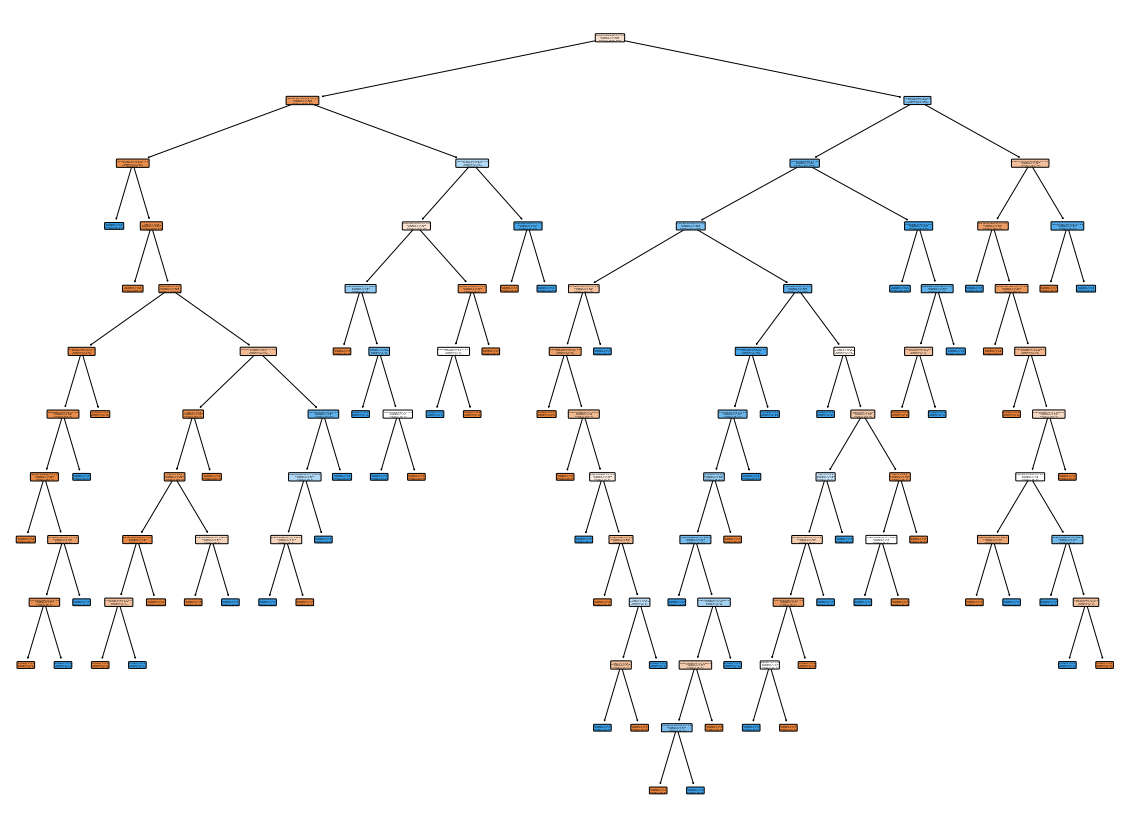

In [10]:
a = DecisionTreeClassifier(criterion='entropy')
a.fit(data,target)
plt.figure(figsize=[20,15]) # width, height in inches
plot_tree(a, 
          feature_names=feature_names,
          class_names=target_names,
          filled=True, rounded=True)
plt.show()

In [4]:
def best_splitter_dec_tree():
    max_maior=0 #guarda o valor da melhor accuracy de todos os cross values realizados
    value=0 #guarda o valor de min_samples_split associado ao melhor resultado obtido
    value2=0 #guarda o valor de max_depth associado ao melhor resultado obtido
    for x in range(21):
        for y in range(13): #tem de encontrar a melhor combinacao possivel...
            dtc = DecisionTreeClassifier(criterion='entropy',min_samples_split=x, max_depth=y)
            scores = cross_val_score(dtc,
                             X=data,
                             y=target,
                             cv=10,
                             n_jobs=-1
                            )
            if np.mean(scores)>max_maior: #se o np.mean score for superior ao max atual, atualizamos o max
                max_maior=np.mean(scores)
                value=x #guardamos os valores utilizados para cada um dos atributos
                value2=y
    print("A maior percentagem eh " + str(max_maior)+ " e utilizamos valor: " + str(value) + " " +str(value2));
    return(value,value2)

valores=best_splitter_dec_tree() #guardamos os melhores valores para os atributos considerados anteriormente
dtc = DecisionTreeClassifier(criterion='entropy',min_samples_split=valores[0],max_depth=valores[1]) 
scores = cross_val_score(dtc, #criamos uma decision tree com os valores obtidos para min_samples_split e max_depth 
                         X=data, #e realizamos o cross_value score
                         y=target,
                         cv=10,
                         n_jobs=-1
                        )
print('CV accuracy:', *scores, sep='\n\t')
print('Average CV accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))



def best_splitter_neighbors(): 
    max_maior=0  #guarda o valor da melhor accuracy de todos os cross values realizados
    neighbors=0 #guarda o valor de vizinhos associado ao melhor resultado obtido
    for x in range(31):
        dtc = KNeighborsClassifier(n_neighbors=x) #verifica os resultados para um n de vizinhos ate 30...
        scores = cross_val_score(dtc,
                             X=data,
                             y=target,
                             cv=10,
                             n_jobs=-1
                            )
        if np.mean(scores)>max_maior:  #se o np.mean score for superior ao max atual, atualizamos o max
            max_maior=np.mean(scores) 
            neighbors=x #guardamos o valor utilizado
    print("A maior percentagem eh " + str(max_maior)+ " e utilizamos valor: " +str(neighbors));
    return neighbors
neighbors=best_splitter_neighbors()
ctc =  KNeighborsClassifier(n_neighbors=neighbors)
scores = cross_val_score(ctc,
                         X=data,
                         y=target,
                         cv=10,
                         n_jobs=-1
                        )
print('CV accuracy:', *scores, sep='\n\t')
print('Average CV accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))




A maior percentagem eh 0.9048951048951048 e utilizamos valor: 13 6
CV accuracy:
	0.8205128205128205
	0.9487179487179487
	0.9230769230769231
	0.9230769230769231
	0.9102564102564102
	0.9230769230769231
	0.9102564102564102
	0.8717948717948718
	0.8571428571428571
	0.948051948051948
Average CV accuracy: 0.904 +/- 0.039
A maior percentagem eh 0.6774225774225775 e utilizamos valor: 30
CV accuracy:
	0.6538461538461539
	0.6282051282051282
	0.6666666666666666
	0.7051282051282052
	0.6794871794871795
	0.7564102564102564
	0.6282051282051282
	0.6666666666666666
	0.6753246753246753
	0.7142857142857143
Average CV accuracy: 0.677 +/- 0.037


Com o código abaixo, são impressos quatro gráficos. Os primeiros três realizam a comparação do *train_set* com o *test_set* de uma *decision tree*, com dados *data*, e parâmetros *min_samples_split*,*max_depth* e *min samples_leaf*, respetivamente. O último gráfico representa o valor de precisão resultante da aplicação de *Cross_val_score* a um algorítmo *KNeighbors* com x vizinhos. 

In [1]:
X_train, X_test, y_train, y_test = train_test_split(data,
                                                    target,
                                                  random_state=2)

csfont = {'fontname':'Comic Sans MS'}

train = []
test = []
for i in range(2,50):
    ad = DecisionTreeClassifier(criterion='entropy', min_samples_split=i)
    ad = ad.fit(X_train,y_train)
    train.append(ad.score(X_train,y_train)*100)
    test.append(ad.score(X_test,y_test)*100)

x = np.arange(2,50,1) # intervalo do eixo dos xx's
plt.plot(x, train, 'bo--', label='Train set')
plt.plot(x, test, 'rd--', label='Test set')
plt.ylim(81,101) # limite dos eixo dos yy's
plt.xlabel('Min. samples split') # legenda do eixo dos xx's
plt.ylabel('Accuracy (in %)') # legenda do eixo dos yy's
plt.legend() # legenda
plt.suptitle('Gráfico de Precisão, conforme o Número Mínimo de Amostras após haver Split',**csfont)
plt.show()

train = []
test = []
for i in range(2,50):
    ad = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    ad = ad.fit(X_train,y_train)
    train.append(ad.score(X_train,y_train)*100)
    test.append(ad.score(X_test,y_test)*100)

x = np.arange(2,50,1) # intervalo do eixo dos xx's
plt.plot(x, train, 'bo--', label='Train set')
plt.plot(x, test, 'rd--', label='Test set')
plt.ylim(81,101) # limite dos eixo dos yy's
plt.xlabel('max_depth') # legenda do eixo dos xx's
plt.ylabel('Accuracy (in %)') # legenda do eixo dos yy's
plt.legend() # legenda
plt.suptitle('Gráfico de Precisão, conforme a Profundidade Máxima da Árvore de Decisão',**csfont)
plt.show()

train = []
test = []
for i in range(2,50):
    ad = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=i)
    ad = ad.fit(X_train,y_train)
    train.append(ad.score(X_train,y_train)*100)
    test.append(ad.score(X_test,y_test)*100)

x = np.arange(2,50,1) # intervalo do eixo dos xx's
plt.plot(x, train, 'bo--', label='Train set')
plt.plot(x, test, 'rd--', label='Test set')
plt.ylim(81,101) # limite dos eixo dos yy's
plt.xlabel(' min_samples_leaf') # legenda do eixo dos xx's
plt.ylabel('Accuracy (in %)') # legenda do eixo dos yy's
plt.legend() # legenda
plt.suptitle('Gráfico de Precisão, conforme o Número Mínimo de Amostras em Cada Nó',**csfont)
plt.show()

graph = []
for i in range(2,81):
    kn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(kn,
                         X=data,
                         y=target,
                         cv=10,
                         n_jobs=-1
                        )
    graph.append(np.mean(score)*100)

# fazer um gráfico com a accuracy
x = np.arange(2,81,1) # intervalo do eixo dos xx's
plt.plot(x, graph, 'bo--', label='Neighbors')
plt.ylim(55,85) # limite dos eixo dos yy's
plt.xlabel('Neighbors') # legenda do eixo dos xx's
plt.ylabel('Accuracy (in %)') # legenda do eixo dos yy's
plt.legend() # legenda
plt.suptitle('Gráfico de Precisão, conforme o Número de Vizinhos',**csfont)
plt.show()


NameError: name 'train_test_split' is not defined

Ao observamos o primeiro gráfico concluimos o que foi anteriormente referido, isto é, a accuracy do *num_min_split* estabiliza após ultrapassar o valor 20. Embora ainda tenha um pico perto dos 30, este não é o melhor valor e logo de seguida decresce e estabiliza novamente. A partir do valor 20 estamos perante uma situação de *underfit*, ou seja, o modelo é demasiado simples e não "preparamos" devidamente o algoritmo.
Seguidamente,como mencionado, o *depth* máximo da árvore de decisão é doze, logo o valor da precisão no segundo gráfico estabiliza a partir desse valor no set de treino. Ora, um *depth* máximo de doze engloba assim toda a árvore de decisão e tal irá manter-se se o *max_depth* for ainda maior. Deste modo, o facto de a árvore se manter igual para *max_depth* a doze ou mais, justifica a estabilização do set treino e a irregularidade do mesmo no set de teste.
<br>
Adicionalmente, no terceiro gráfico, visualizamos uma situação semelhante ao primeiro, ou seja, uma situação de *underfit* quando o número de samples é vinte ou mais.
<br>
Por último, a observação do gráfico quatro leva-nos novamente a afirmar que o valor de vizinhos mais adequado é trinta, o que já tinha sido antes concluido pelo grupo vinte e dois: após serem realizados vários testes com vários limites superiores a trinta, o melhor resultado foi sempre trinta, precisamente!

### Etapa 4 - Gravação das Previsões

Nesta etapa, vamos fazer *load* aos dados do ficheiro *test.csv*, o qual iremos utilizar para testar a precisão do algoritmo *Decision Tree Classifier*

In [15]:
data_test, features_names_test = load_data("test.csv",testdata=True)

De seguida, convertemos os atributos numéricos em binários, tal como efetuado na etapa 2, e criamos uma árvore de decisão, com base nos melhores values obtidos pela função *best_splitter_dec_tree*. Utilizamos a função fit, de modo a treinar a árvore (o "treino" apresenta os valores do ficheiro *airline.csv*), e consequentemente prevemos os resultados que irão ser obtidos no ficheiro *test.csv* com o método *predict*, sendo esses resultados guardados num ficheiro CSV. Para gravar as nossas previsões para o conjunto de teste, usámos a função *save_data*,  gerando um ficheiro CSV com o nome *IIA2021-proj4-22.csv*.

In [16]:
features_names_test =  features_names_test[1:]
data_test = data_test[:,1:]
data_test[:,0]=encode_feature(data_test[:,0])
data_test[:,1]=encode_feature(data_test[:,1])
data_test[:,3]=encode_feature(data_test[:,3])
data_test, features_names_test = one_hot_encode_feature(data_test, 4, features_names_test)
dtc = DecisionTreeClassifier(criterion='entropy',min_samples_split=valores[0],max_depth=valores[1])
dtc.fit(data,target)
var=dtc.predict(data_test)
save_data('IIA2021-proj4-22.csv',var)


<b>Nota:</b> No decorrer do relatório, quando nos referimos a precisão, estamos a referir-nos à *accuracy* de cada algoritmo efetuado.